# 결정트리 (Decision Tree Classifier)
- 결정트리는 스무고개처럼 특정 파라미터를 가지고 스무고개처럼 질문을 던져나가면서 정답을 맞춰나간다.
- 결정트리는 선형 회귀 모델보다 설명하기 쉬운 모델이다. 
  - 결과를 시각화했을 때, 어떤 파라미터가 결정하는데 도움을 주었는지 볼수 있기떄문


In [ ]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.info()

# 모든 데이터가 6497개의 행으로 이루어져있으며, 비어있는 값은 존재하지않는다 (non-null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
# 도수, 당도, 산도를 가지고 어떤 와인인지 맞추기위해 데이터를 전처리함

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

print(train_input[0])


from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
# 데이터 표준화 진행

[10.5   7.7   3.19]


0.7808350971714451
0.7776923076923077
LogisticRegression 성능이 그닥 좋지 않다.
0.996921300750433
0.8592307692307692
DecisionTreeClassifier의 성능이 월등히 좋다. 하지만 오버피팅 발생


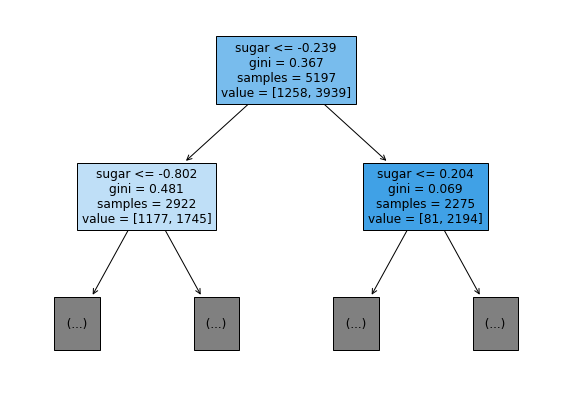

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print('LogisticRegression 성능이 그닥 좋지 않다.')

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
print('DecisionTreeClassifier의 성능이 월등히 좋다. 하지만 오버피팅 발생')


import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['achohol', 'sugar', 'pH'])
plt.show()


0.8454877814123533
0.8415384615384616
DecisionTreeClassifier의 max_depth를 조절해서 피팅이 되었으나, 정확도가 낮아짐


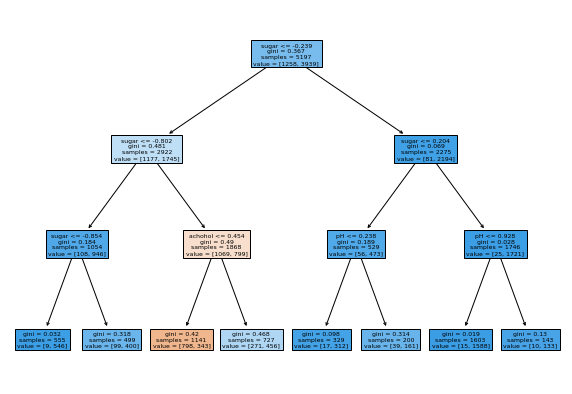

In [ ]:
# 결정트리 가지치기해서 오버피팅 없에기
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
print('DecisionTreeClassifier의 max_depth를 조절해서 피팅이 되었으나, 정확도가 낮아짐')

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt, filled=True, feature_names=['achohol', 'sugar', 'pH'])
plt.show()

In [ ]:
feature_names=['achohol', 'sugar', 'pH']
print('어떤 파라미터가 결정트리에 얼마나 영향을 끼쳣는지 알고싶으면 .feature_importances_ 을 확인하면된다')
print('배열에 있는 값은 데이터를 전달했을 때의 순서와 동일하다. 결과를 보면 설탕이 가장 영향이 크다. 트리노드를 시각화했을 때 루트노드에 있는 비교값이 설탕이기 때문이다. ')
print(feature_names)
print(dt.feature_importances_)

['achohol', 'sugar', 'pH']
[0.12345626 0.86862934 0.0079144 ]


- 부등호로 비교된 당도값이 모델의 테스트 조건이 되었다.
- 박스는 각 depth마다 존재하는 노드를 나타낸다. 노드는 depth마다 하위 노드가 2개 생성된다.
- gini는 불순도를 나타낸다. 불순도가 0인 노드를 순수노드라고 부른다.
  ```
  a = value[0]; 
  b = value[1];
  gini = 1-((a/smaples)**2 + (b/smaples)**2)
  ```
- sample은 해당 노드에서의 샘플데이터 갯수를 나타낸다.
- value는 샘플데이터에서 테스트조건의 결과에 대한 카운트를 나타낸다. 둘이 더하면 sample값이 됨
- 부모-자식 간의 불순도의 차이를 *정보 이득*(information gain)이라고한다.
- 결정 트리 모델에서는 부모-자식간의 정보 이득을 최대가 되도록 데이터를 나누어 학습한다.
- 불순도를 계산하는 방법은 여러개가 있는데, `criterion=`파라미터에서 지정가능하다.

---

- 근데 특정 데이터를 학습할 떄, 어떤 모델이 더 적합할지는 직접 실행시켜봐야 알 수 있는건가? 그럼 전부 실행시켜봐야하는건가?
- 어떻게해서 모델을 찾았다고 했을 떄, 그 모델에서 쓰이는 파라미터 값은 또 어떻게 최적의 값을 찾아내야하는걸까? 특정범위의 값을 전부 입력해야하는건가? 

```plain
  Logisitc Regression은 Logit으로 Link function을 구성한 Parametric, Linear 모델이야. 이 모델을 fitting 할 때엔 LogLoss를 이용해 학습하고
  반면 Decision Tree classifier는 Non-parametric, non-linear 모델이야. Node split할 때 Information gain이나 Gini index를 이용해 학습하는 방식이고
  요컨대 데이터가 어떤 형태를 따를지 모를 때엔 Nonlinear, non-parametric 모델이 성능이 좋음. Linearity에 대한 가정도 없고, 확률분포에 대한 가정도 없기 때문이야.
  이런 내용들을 알려면 코드 따라 치는 책말구, 다른 책에서 나옴
본문 두 번째 질문에 대한 답도, Parametric 모델이냐 아니냐에 따라 다름. Analytical solution이 있느냐 없느냐에 따라서도 또 다르고 이 또한 다른 책에 

  ISLR (Introduction to Statistical Learning in R) 구글에 치면 pdf 무료로 받을 수 있는데, 이 책이 개론서로 적당할 듯
  ```
- 커뮤니티에서 답변을 받아봤다. 이런 부분을 좀 더 깊게 들어가려면 통계학적인 지식도 전문적으로 필요하다는걸 알 수 있었다.